In [23]:
# импорт нужных библиотек
import pandas as pd
from prophet import Prophet
from prophet.diagnostics import performance_metrics
from prophet.diagnostics import cross_validation
from prophet.plot import plot_cross_validation_metric

In [2]:
# чтение файла
file = 'df4eda.csv'
df = pd.read_csv(file, index_col=0)

/tmp/ipykernel_106/2478625627.py:3: DtypeWarning: Columns (22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, index_col=0)


In [3]:
# выберу нужные столбцы
df = df[['Date','Revenue_T']]

In [4]:
# проверю правильность типов
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048575 entries, 0 to 1048574
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Date       1048575 non-null  object 
 1   Revenue_T  1048575 non-null  float64
dtypes: float64(1), object(1)
memory usage: 24.0+ MB


In [5]:
# удаление дубликатов
df = df.drop_duplicates()

In [6]:
# АГРЕГАЦИЯ И ГРУППИРОВКА

#агрегация и суммирование по датам
agg_func_math = {
    'Revenue_T': ['sum']
}

# группирую по дате (месяц-год) и считаю статистические величины и все округляю до второго знака
df = df.groupby(['Date']).agg(agg_func_math).round(2).reset_index()

In [7]:
#проверяю, что с дуюликатами
duplicate_rows_df = df[df.duplicated()]
print(duplicate_rows_df)
print("number of duplicate rows: ", duplicate_rows_df.shape)

Empty DataFrame
Columns: [(Date, ), (Revenue_T, sum)]
Index: []
number of duplicate rows:  (0, 2)


In [8]:
# в новом датасете создам из названий мультииндексных родительских, объединяя через нижнее подчеркивание
df.columns = ['_'.join(col) for col in df.columns.values]

# сброшу индексы
df = df.reset_index()
df

index       Date_  Revenue_T_sum
0         0  2002-04-30      954560.88
1         1  2002-05-01      501617.97
2         2  2002-05-02      460054.35
3         3  2002-05-03      212396.94
4         4  2002-05-05      634911.48
...     ...         ...            ...
4475   4475  2014-12-26      900359.46
4476   4476  2014-12-27     1083511.17
4477   4477  2014-12-28     1189215.09
4478   4478  2014-12-29      420040.53
4479   4479  2014-12-30     1825510.05

[4480 rows x 3 columns]

In [9]:
# переименую колонку даты и колонку прибыли в требуемые для библиотеки названия
df = df.rename(columns={"Date_": "ds", "Revenue_T_sum": "y"})

# удалю лишний столбец index
df.drop(['index'], axis=1, inplace=True)

In [10]:
# создаю экземпляр класса анализатора временных рядов "Пророк"
m = Prophet()

# обучаю этот экземпляр на моей подготовленной выборке
m.fit(df)

10:47:41 - cmdstanpy - INFO - Chain [1] start processing
10:47:42 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
# продолжаю датайрейм на год для прогнозирования
future = m.make_future_dataframe(periods=365)
future.tail()

ds
4840 2015-12-26
4841 2015-12-27
4842 2015-12-28
4843 2015-12-29
4844 2015-12-30

In [12]:
future

ds
0    2002-04-30
1    2002-05-01
2    2002-05-02
3    2002-05-03
4    2002-05-05
...         ...
4840 2015-12-26
4841 2015-12-27
4842 2015-12-28
4843 2015-12-29
4844 2015-12-30

[4845 rows x 1 columns]

In [13]:
# на обученной модели создаю прогноз на год 
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds           yhat     yhat_lower    yhat_upper
4840 2015-12-26  745616.716527  323373.466431  1.146673e+06
4841 2015-12-27  745371.378621  362273.817877  1.156170e+06
4842 2015-12-28  666503.472187  288482.332996  1.059053e+06
4843 2015-12-29  687083.336021  288765.839644  1.086652e+06
4844 2015-12-30  871036.633989  477842.521722  1.283808e+06

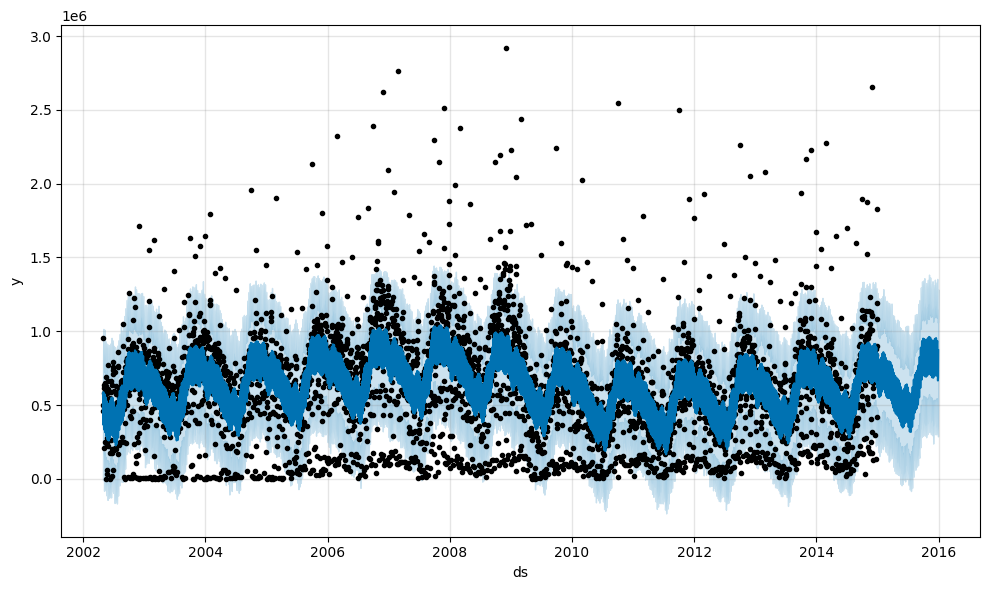

In [14]:
# строю график временного ряда по существующим годам и с прогнозом на год
fig1 = m.plot(forecast)

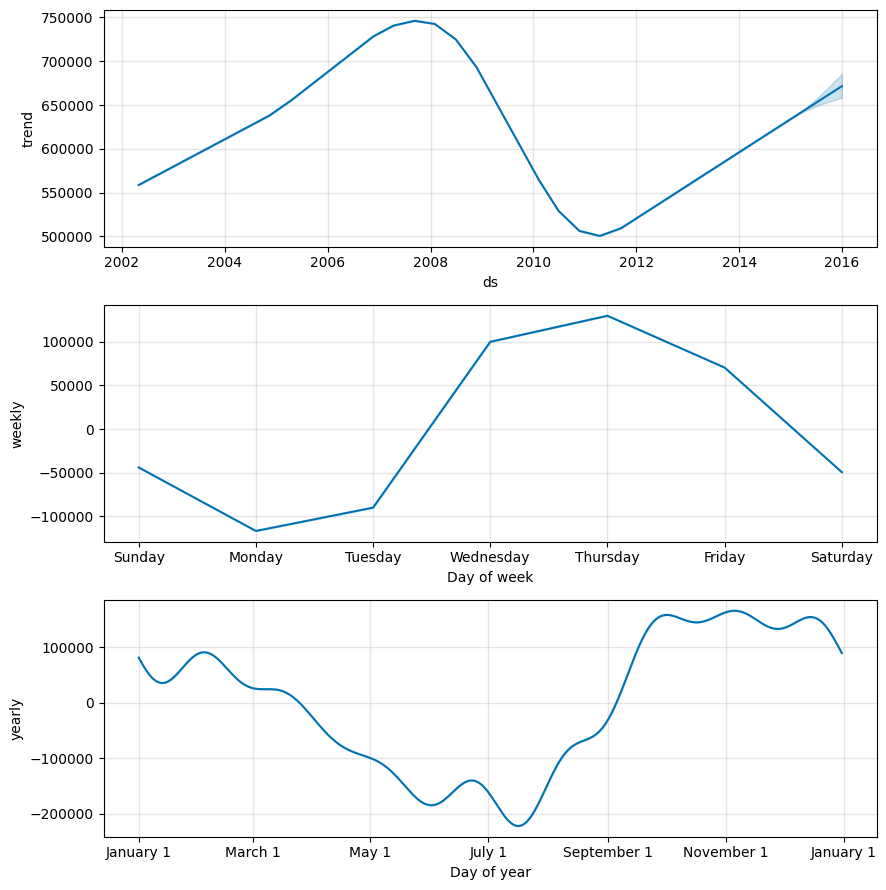

In [15]:
# смотрю составляющие: тренд, недельные колебания, годовые колебания
fig2 = m.plot_components(forecast)

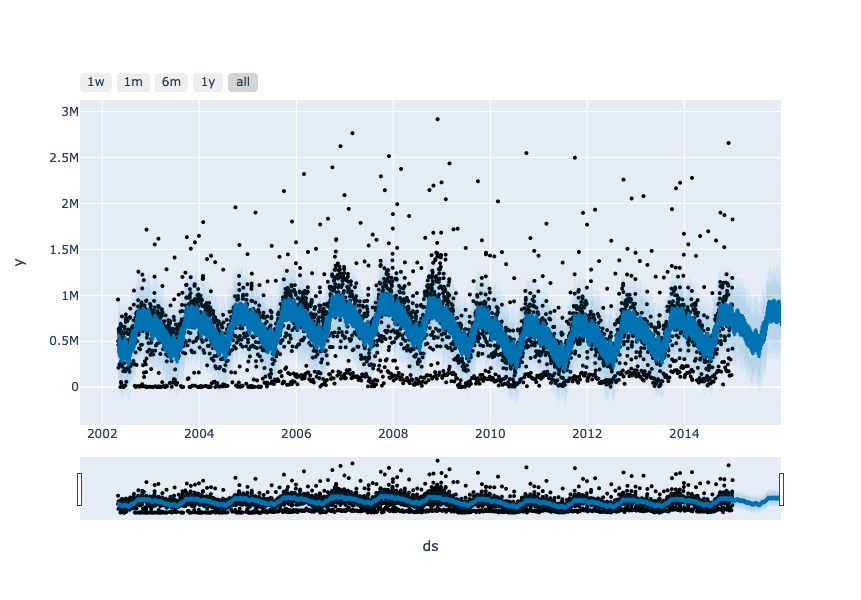

In [16]:
# тоже самое с более красивой визуализацией
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

/venv_neuroprophet/lib/python3.9/site-packages/plotly/io/_json.py:557: UserWarning:

Discarding nonzero nanoseconds in conversion.



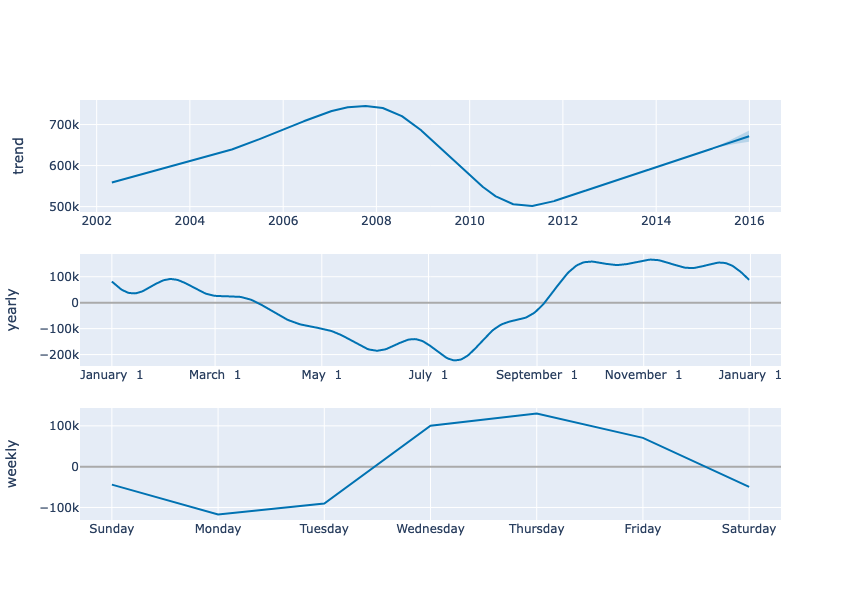

In [17]:
plot_components_plotly(m, forecast)

In [19]:
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')

  0%|          | 0/20 [00:00<?, ?it/s]

10:49:48 - cmdstanpy - INFO - Chain [1] start processing
10:49:49 - cmdstanpy - INFO - Chain [1] done processing
10:49:49 - cmdstanpy - INFO - Chain [1] start processing
10:49:49 - cmdstanpy - INFO - Chain [1] done processing
10:49:49 - cmdstanpy - INFO - Chain [1] start processing
10:49:49 - cmdstanpy - INFO - Chain [1] done processing
10:49:50 - cmdstanpy - INFO - Chain [1] start processing
10:49:50 - cmdstanpy - INFO - Chain [1] done processing
10:49:50 - cmdstanpy - INFO - Chain [1] start processing
10:49:50 - cmdstanpy - INFO - Chain [1] done processing
10:49:51 - cmdstanpy - INFO - Chain [1] start processing
10:49:51 - cmdstanpy - INFO - Chain [1] done processing
10:49:51 - cmdstanpy - INFO - Chain [1] start processing
10:49:52 - cmdstanpy - INFO - Chain [1] done processing
10:49:52 - cmdstanpy - INFO - Chain [1] start processing
10:49:52 - cmdstanpy - INFO - Chain [1] done processing
10:49:53 - cmdstanpy - INFO - Chain [1] start processing
10:49:53 - cmdstanpy - INFO - Chain [1]

In [20]:
df_cv.head()

ds           yhat     yhat_lower    yhat_upper          y     cutoff
0 2004-08-20  629089.452516  256093.869713  9.589859e+05  573235.11 2004-08-19
1 2004-08-21  525754.270844  195039.076366  8.812167e+05  392701.68 2004-08-19
2 2004-08-23  432757.570279   86208.952098  7.825359e+05  567927.99 2004-08-19
3 2004-08-24  562972.215449  238357.236138  9.010548e+05  659560.86 2004-08-19
4 2004-08-25  662731.542118  298140.730462  1.010158e+06  640184.58 2004-08-19

In [21]:
df_p = performance_metrics(df_cv)

horizon           mse           rmse            mae      mape     mdape  \
0 37 days  9.235907e+10  303906.358836  208937.219453  1.428525  0.239943   
1 38 days  9.296874e+10  304907.756202  210392.037476  1.410600  0.239943   
2 39 days  9.671498e+10  310990.327356  213512.073715  1.483781  0.241943   
3 40 days  9.781053e+10  312746.750932  215291.776087  1.460111  0.244471   
4 41 days  9.798626e+10  313027.564127  214862.117591  1.442237  0.238761   

      smape  coverage  
0  0.418169  0.850963  
1  0.419536  0.850491  
2  0.421904  0.849044  
3  0.422050  0.846283  
4  0.418674  0.845372

In [22]:
df_p

horizon           mse           rmse            mae      mape     mdape  \
0    37 days  9.235907e+10  303906.358836  208937.219453  1.428525  0.239943   
1    38 days  9.296874e+10  304907.756202  210392.037476  1.410600  0.239943   
2    39 days  9.671498e+10  310990.327356  213512.073715  1.483781  0.241943   
3    40 days  9.781053e+10  312746.750932  215291.776087  1.460111  0.244471   
4    41 days  9.798626e+10  313027.564127  214862.117591  1.442237  0.238761   
..       ...           ...            ...            ...       ...       ...   
324 361 days  1.119417e+11  334576.871084  246832.013111  1.752548  0.318315   
325 362 days  1.134385e+11  336806.349254  248292.496169  1.749168  0.324231   
326 363 days  1.122568e+11  335047.408379  247180.802179  1.788256  0.321618   
327 364 days  1.114311e+11  333813.044233  247325.527566  1.787093  0.326955   
328 365 days  1.147351e+11  338725.683366  250843.316459  1.851132  0.332958   

        smape  coverage  
0    0.418169  0.850963  
1    0.419536  0.850491  
2    0.421904  0.849044  
3    0.422050  0.846283  
4    0.418674  0.845372  
..        ...       ...  
324  0.520462  0.809677  
325  0.522191  0.807042  
326  0.525110  0.809724  
327  0.528231  0.808592  
328  0.535533  0.806140  

[329 rows x 8 columns]

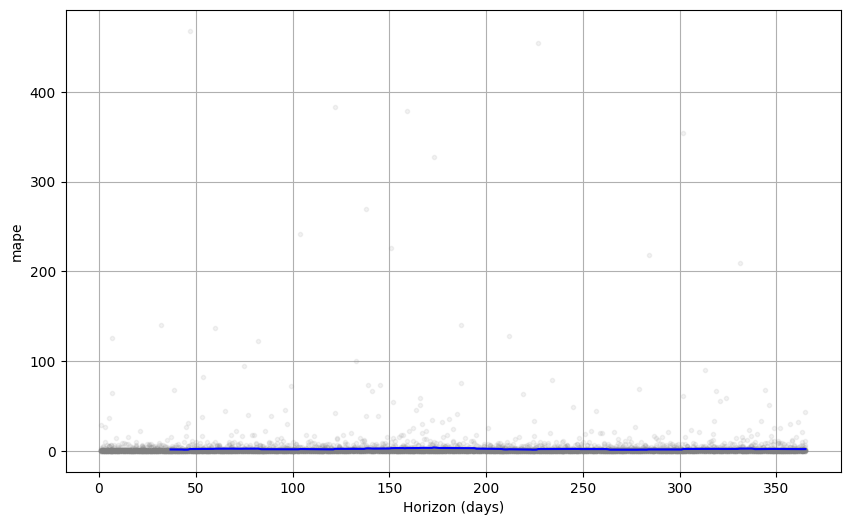

In [26]:
fig = plot_cross_validation_metric(df_cv, metric='mape')

> Точность весьма не плохая - 1,5%. Данной моделю можно смело пользоваться для прогнозирования прибыли на предстоящий год